# <center>  Lending Club Fraud Detection -- Data Cleaning and Explorative Analysis
### <center> Ziyi Lu, Aug-Sep 2019$^*$
     * Lu: Department of Applied Economics, University of Wisconsing Madison.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import datetime as dt
from datetime import datetime

**cleaning and EDA on the main dataset**

In [2]:
# training data set
dat_raw = pd.read_csv("C:/Users/luziy/Documents/datacamp/notes/FinTech/data/LoanStats3d_securev1.csv")

# missing values: 
# after EDA will drop observations fewer than 100000: 50% of missing values are already very tolerant 
var_drop = dat_raw.count().index.values[dat_raw.count() < 1000]

# drop: 1, features which are almost identical to another feather; 2, invariant features; 3, non-usable features
var_drop = np.append(var_drop, ['url', 'funded_amnt', 'funded_amnt_inv', 'total_pymnt_inv',  'zip_code','title', 'application_type',
                               'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'num_tl_120dpd_2m', 'num_tl_30dpd' ]  )

dat_raw = dat_raw.drop(var_drop, axis = 1)

dattr_colnames_conv = list(map(lambda x: x.replace( "_", "").lower(), dat_raw.dtypes.index))
dat_raw.columns = dattr_colnames_conv 
dattr_info = pd.DataFrame( { "colname": dattr_colnames_conv   ,  "dtype": dat_raw.dtypes.tolist()} )
dattr_info.shape

C:\Users\luziy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(119, 2)

In [3]:
pd.set_option('display.max_columns', 999)
dat_raw.head()

,id,loanamnt,term,intrate,installment,grade,subgrade,emptitle,emplength,homeownership,annualinc,verificationstatus,issued,loanstatus,pymntplan,purpose,addrstate,dti,delinq2yrs,earliestcrline,ficorangelow,ficorangehigh,inqlast6mths,mthssincelastdelinq,mthssincelastrecord,openacc,pubrec,revolbal,revolutil,totalacc,initialliststatus,outprncp,outprncpinv,totalpymnt,totalrecprncp,totalrecint,totalreclatefee,recoveries,collectionrecoveryfee,lastpymntd,lastpymntamnt,nextpymntd,lastcreditpulld,lastficorangehigh,lastficorangelow,mthssincelastmajorderog,policycode,totcollamt,totcurbal,openacc6m,openactil,openil12m,openil24m,mthssincercntil,totalbalil,ilutil,openrv12m,openrv24m,maxbalbc,allutil,totalrevhilim,inqfi,totalcutl,inqlast12m,accopenpast24mths,avgcurbal,bcopentobuy,bcutil,mosinoldilacct,mosinoldrevtlop,mosinrcntrevtlop,mosinrcnttl,mortacc,mthssincerecentbc,mthssincerecentbcdlq,mthssincerecentinq,mthssincerecentrevoldelinq,numacctsever120pd,numactvbctl,numactvrevtl,numbcsats,numbctl,numiltl,numoprevtl,numrevaccts,numrevtlbalgt0,numsats,numtl90gdpd24m,numtloppast12m,pcttlnvrdlq,percentbcgt75,pubrecbankruptcies,taxliens,tothicredlim,totalbalexmort,totalbclimit,totalilhighcreditlimit,hardshipflag,hardshiptype,hardshipreason,hardshipstatus,deferralterm,hardshipamount,hardshipstartdate,hardshipenddate,paymentplanstartdate,hardshiplength,hardshipdpd,hardshiploanstatus,origprojectedadditionalaccruedinterest,hardshippayoffbalanceamount,hardshiplastpaymentamount,debtsettlementflag,debtsettlementflagdate,settlementstatus,settlementdate,settlementamount,settlementpercentage,settlementterm
0,67275481,20000.0,36 months,8.49%,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.0,Not Verified,Dec-15,Fully Paid,n,major_purchase,SC,17.61,1.0,Feb-99,705.0,709.0,0.0,3.0,NaN,8.0,0.0,826.0,5.70%,15.0,w,0.0,0.0,21538.508980,20000.0,1538.51,0.0,0.0,0.0,Jan-17,14618.23,NaN,Sep-19,674.0,670.0,3.0,1.0,0.0,141601.0,0.0,3.0,0.0,4.0,13.0,27111.0,75.0,0.0,0.0,640.0,55.0,14500.0,1.0,0.0,2.0,4.0,17700.0,13674.0,5.7,149.0,55.0,32.0,13.0,3.0,32.0,NaN,8.0,NaN,1.0,2.0,2.0,3.0,3.0,9.0,3.0,3.0,2.0,8.0,1.0,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68366663,24000.0,60 months,9.80%,507.58,B,B3,NaN,NaN,OWN,77900.0,Not Verified,Dec-15,Fully Paid,n,home_improvement,TN,10.24,0.0,Oct-82,740.0,744.0,1.0,50.0,NaN,9.0,0.0,3454.0,10.30%,21.0,w,0.0,0.0,29563.596280,24000.0,5563.60,0.0,0.0,0.0,Apr-19,10308.23,NaN,Apr-19,839.0,835.0,50.0,1.0,0.0,127412.0,0.0,1.0,0.0,0.0,73.0,1456.0,4.0,0.0,1.0,3309.0,7.0,33600.0,1.0,0.0,2.0,1.0,14157.0,27172.0,10.9,139.0,398.0,22.0,22.0,2.0,22.0,NaN,0.0,NaN,1.0,2.0,3.0,4.0,6.0,6.0,7.0,13.0,3.0,9.0,0.0,0.0,95.2,0.0,0.0,0.0,202351.0,4910.0,30500.0,33631.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68407301,27500.0,60 months,14.85%,652.06,C,C5,Manager,10+ years,MORTGAGE,195000.0,Not Verified,Dec-15,Fully Paid,n,other,LA,6.79,0.0,Jul-01,700.0,704.0,0.0,NaN,NaN,14.0,0.0,34974.0,50.90%,19.0,w,0.0,0.0,29753.170000,27500.0,2253.17,0.0,0.0,0.0,Aug-16,25897.53,NaN,Jul-16,734.0,730.0,NaN,1.0,0.0,267500.0,1.0,1.0,0.0,1.0,21.0,10003.0,76.0,1.0,3.0,12056.0,55.0,68700.0,0.0,0.0,0.0,4.0,19107.0,23969.0,56.8,21.0,173.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,0.0,6.0,10.0,7.0,9.0,1.0,12.0,17.0,10.0,14.0,0.0,1.0,100.0,57.1,0.0,0.0,325100.0,44977.0,55500.0,13200.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68596180,20000.0,36 months,5.32%,602.30,A,A1,driver,9 years,OWN,65000.0,Not Verified,Dec-15,Fully Paid,n,debt_consolidation,NY,18.83,0.0,May-91,835.0,839.0,1.0,NaN,NaN,12.0,0.0,2269.0,3%,17.0,w,0.0,0.0,21631.724330,20000.0,1631.72,0.0,0.0,0.0,Aug-18,3577.50,NaN,Aug-18,809.0,805.0,NaN,1.0,0.0,15444.0,0.0,2.0,0.0,1.0,15.0,13175.0,44.0,0.0,1.0,1448.0,15.0,76200.0,2.0,0.0,1.0,2.0,1287.0,73931.0,3.0,63.0,295.0,19.0,15.0,0.0,19.0,NaN,4.0,NaN,0.0,3.0,3.0,10.0,11.0,4.0,10.0,13.0,3.0,12.0,0.0,0.0,100.0,0.0,0.

**training dataset and combine**

In [4]:
# testing dataset 
dat_recent = open("C:/Users/luziy/Documents/datacamp/notes/FinTech/data/current_list.txt")

dt_recent = dat_recent.read()

df_recent = pd.DataFrame.from_dict(json.loads(dt_recent) )

In [5]:
# find common elements

datt_colnames_conv = list(map(str.lower, df_recent.dtypes.index))

df_recent.columns = datt_colnames_conv

# test data feature - train data feature 
common_element_rename =  {'acceptd':'issued', 'addrzip':'zipcode', 'fundedamount': 'fundedamnt', 
                            'loanamount':'loanamnt',   'numacctsever120ppd' : 'numacctsever120pd'    }

df_recent = df_recent.rename(columns = common_element_rename)

# convert all column names to small letters and get rid of all _
datt_info = pd.DataFrame( { "colname": df_recent.columns ,  "dtype": df_recent.dtypes.tolist()} )

print(len(dattr_info.colname.values), "features in the training set,", len(datt_info.colname.values), "in the testing set")

common_element_ord = [(i in datt_info.colname.values) for i in dattr_info.colname.values]
common_element = dattr_info.colname.values[common_element_ord]
print("there are", len(common_element), "common elements in the training and testing datasets")

119 features in the training set, 119 in the testing set
there are 79 common elements in the training and testing datasets


In [6]:
# check hardshipstatus before dropping
pd.crosstab(dat_raw.loanstatus, dat_raw.hardshipreason)

hardshipreason,DISABILITY,DIVORCE,EXCESSIVE_OBLIGATIONS,FAMILY_DEATH,INCOME_CURTAILMENT,MEDICAL,NATURAL_DISASTER,REDUCED_HOURS,UNEMPLOYMENT
loanstatus,,,,,,,,,
Charged Off,21,34,253,18,175,183,202,92,280
Current,4,4,71,7,42,36,105,17,65
Fully Paid,14,19,146,19,78,88,388,41,89
In Grace Period,2,1,22,2,6,6,6,7,3
Late (16-30 days),0,0,5,3,1,4,3,1,3
Late (31-120 days),2,2,29,4,29,18,5,11,22


In [7]:
# training set: add label, add flag
df_train = dat_raw.loc[ :, np.append(common_element, "loanstatus") ]
df_train.loc[ :, "flag" ] = "train"
df_train.shape

(421097, 81)

In [8]:
# testing set: add label, add flag
df_test = df_recent.loc[ :, common_element]

df_test.loc[:, "loanstatus"] = float('nan')
df_test.loc[:, "flag"] = "test"

df_test.shape

(16, 81)

**only use term=36 months and loanstatus = fully paid and charged off, combine**

In [9]:
pd.crosstab(dat_raw.loanstatus, dat_raw.term)

term,36 months,60 months
loanstatus,,
Charged Off,42178,35706
Current,3,34172
Default,1,3
Fully Paid,240991,66329
In Grace Period,0,544
Late (16-30 days),0,171
Late (31-120 days),0,997


In [10]:
df_train = df_train.loc[df_train.term == ' 36 months', :]

df_train.loc[df_train.loanstatus == 'Charged Off', "loanstatus"] = 0
 
df_train.loc[df_train.loanstatus == "Fully Paid", "loanstatus"] = 1
    
df_train = df_train.loc[(df_train.loanstatus == 0) | (df_train.loanstatus == 1) , :]

df_train = df_train.reset_index(drop=True)

df_train.shape

(283169, 81)

In [11]:
# combine the two datasets and generate new time variables
df_full = pd.concat( [ df_train, df_test], axis = 0)
df_full = df_full.drop("term", axis = 1)
df_full.shape

(283185, 80)

In [12]:
# EDA is done. drop features of too many missing values: 
var_drop = df_full.count().index.values[df_full.count() < 100000]

df_full = df_full.drop(var_drop, axis = 1)

df_full.count().sort_values().head(20)

mthssincerecentrevoldelinq    103511
mthssincelastdelinq           147286
mthssincerecentinq            251933
emptitle                      264164
emplength                     264213
mosinoldilacct                273223
percentbcgt75                 280097
bcutil                        280155
bcopentobuy                   280350
mthssincerecentbc             280458
revolutil                     283059
loanstatus                    283169
dti                           283183
numrevaccts                   283184
mortacc                       283185
mosinrcnttl                   283185
numbcsats                     283185
numacctsever120pd             283185
numactvbctl                   283185
numactvrevtl                  283185
dtype: int64

**regrouping-frenquency encoding**

In [13]:
df_full.emptitle

0                                      road driver
1                                           driver
2                                   Vendor liaison
3                                   Senior Manager
4                            Owner, Fee Appraiser 
5                                   DEPUTY SHERIFF
6                              Contract Specialist
7                                    Sales Manager
8                 Director of Product Development 
9                  Network Security Specialist III
10                      Public Affairs Specialist 
11                  Legal Administrative Assistant
12                                              GM
13                                            tech
14                                 SERVICE MANAGER
15                                         Analyst
16                                         Carrier
17                                 Clinical Intake
18                     Sales Representative/ Agent
19                             

In [14]:
# regrouping: 'emptitle',
emptitle_info = df_full.emptitle.value_counts().reset_index()

emptitle_info.columns = ["emptitle", "emptitle_freq"]

df_full = df_full.merge(emptitle_info, how = "left", on = "emptitle")

df_full = df_full.drop("emptitle", axis = 1)

In [15]:
# regrouping: 'addrstate',
addrstate_info = df_full.addrstate.value_counts().reset_index()

addrstate_info.columns = ["addrstate", "addrstate_freq"]

df_full = df_full.merge(addrstate_info, how = "left", on = "addrstate")

# drop it after EDA
#df_full = df_full.drop("addrstate", axis = 1)

**ordinal encoding**

In [16]:
# grade and subgrade
Dic_grade = {"A":1,
             "B":2,
             "C":3,
             "D":4,
             "E":5,
             "F":6,
             "G":7}

df_full.grade = df_full.grade.map(Dic_grade)

subgrade_uniq = sorted(df_full.subgrade.unique().tolist())

Dic_subgrade = {  subgrade_uniq[i]:i+1 for i in range(len(subgrade_uniq))}

df_full.subgrade = df_full.subgrade.map(Dic_subgrade)

In [17]:
# emplength
emplength_uniq = df_full.emplength.unique().tolist()

emplength_year = [10,9,4,2,0,1,6,8,5,3,float("nan"), 7]

Dic_emplength = { emplength_uniq[i]:emplength_year[i] for i in range(len(emplength_year)) }

df_full.emplength = df_full.emplength.map(Dic_emplength)

**type conversion**

In [18]:
# should convert to float:  'revolutil'
revolutil = df_full.revolutil.astype(str)

df_full.loc[:, 'revolutil'] = [revolutil[i].replace('%', '') for i in range(len(df_full.revolutil))]

df_full.loc[:, 'revolutil'] = df_full.revolutil.astype(float)

In [19]:
# convert to float: intrate

intrate = df_full.intrate.astype(str)

df_full.loc[:, 'intrate'] = [intrate[i].replace('%', '') for i in range(len(df_full.intrate))]

df_full.loc[:, 'intrate'] = df_full.intrate.astype(float)


In [20]:
# date conversion -- issued, retain month as a string to capture seasonality
issued_tr = df_full.issued[df_full.flag == "train"]

df_full.loc[df_full.flag == "train", 'issued'] = [str(datetime.strptime(issued_tr[i], '%b-%y').month) for i in range(len(issued_tr))]   # not string yet?? 

df_full.loc[df_full.flag == "test", 'issued'] = str(9)

In [21]:
# date conversion -- earliestcrline, retain year as int to capture credit history 
earliestcrline_tr = df_full.earliestcrline[df_full.flag == "train"]

df_full.loc[df_full.flag == "train", 'earliestcrline'] = [ float(datetime.strptime(earliestcrline_tr[i], '%b-%y').year) for i in range(len(earliestcrline_tr))] 

earliestcrline_t = df_full.loc[df_full.flag == "test", 'earliestcrline'].values

earliestcrline_t_year = [ i[0:4] for i in earliestcrline_t  ]

df_full.loc[df_full.flag == "test", 'earliestcrline'] = pd.Series(earliestcrline_t_year).astype("float").tolist()

In [22]:
# earliestcrline: turn to crhist (credit history)
df_full.loc[df_full.flag == "train", "crhist"] = 2015 - df_full.earliestcrline.astype("float")
df_full.loc[df_full.flag == "test", "crhist"] = 2019 - df_full.earliestcrline.astype("float")
df_full.loc[df_full.crhist < 0 , "crhist"] = 0

df_full = df_full.drop("earliestcrline", axis = 1)

In [23]:
df_full.shape

(283185, 64)

In [24]:
# convert to integer
num2int = ['inqlast6mths', 'pubrec', 'numtl90gdpd24m', 'pubrecbankruptcies', 'taxliens' ]

df_full[num2int] = df_full[num2int].astype('int64')

**one hot encoding**

In [25]:
df_full.purpose.value_counts()

debt_consolidation    161070
credit_card            70684
home_improvement       17173
other                  15236
major_purchase          5349
medical                 3147
car                     2769
small_business          2429
vacation                2072
moving                  2062
house                   1005
renewable_energy         185
wedding                    3
educational                1
Name: purpose, dtype: int64

In [26]:
# top 5 purposes
purpose_lst = df_full.purpose.value_counts().index[0:4].tolist()

In [27]:
df_full.loc[ ~df_full.purpose.isin(purpose_lst) , "purpose" ] = "other" 

In [28]:
onehot_features = ['homeownership','initialliststatus', "purpose"]

dummies = pd.get_dummies(df_full[onehot_features])  # drop empty features

dummies = dummies.drop( [ 'homeownership_ANY', 'initialliststatus_F' ] , axis = 1 )

In [29]:
dummies.count()

homeownership_MORTGAGE        283185
homeownership_OWN             283185
homeownership_RENT            283185
initialliststatus_f           283185
initialliststatus_w           283185
purpose_credit_card           283185
purpose_debt_consolidation    283185
purpose_home_improvement      283185
purpose_other                 283185
dtype: int64

In [30]:
df_full = pd.concat([df_full,dummies ],axis = 1)

# drop it after EDA

**look at all variables**

In [31]:
pd.Series(df_full.dtypes.values).value_counts()

float64    48
uint8       9
object      8
int64       8
dtype: int64

In [32]:
# detect outliers for continuous features
# Function to Detection Outlier on one-dimentional datasets.
# adapted from https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

def find_anomalies(cont_feature):
    # Set upper and lower limit to 5 standard deviation
    random_data_std = np.std(df_full[cont_feature])
    random_data_mean = np.mean(df_full[cont_feature])
    anomaly_cut_off = random_data_std * 5
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
#    Generate index
    index_outlier =  df_full.loc[ (df_full[cont_feature] > upper_limit) | (df_full[cont_feature] < lower_limit), "id"  ]
    return index_outlier

In [33]:
feature_cont = df_full.loc[ :, df_full.dtypes.values == 'float64']
full_lst = list()   # one list holding outliers for all the features
list_of_lst = list() # list of lists holding outliers for each of the features

for cont_feature in feature_cont.columns.values:
    index_outlier = find_anomalies(cont_feature).values.tolist()
    list_of_lst.append(index_outlier)
    full_lst.extend(index_outlier)

outlier_index = pd.Series(full_lst).unique()

len(outlier_index)

18105

In [34]:
df_full = df_full[ ~df_full.id.isin(outlier_index) ]
feature_cont = df_full.loc[ :, df_full.dtypes.values == 'float64']

In [35]:
feature_cont.shape

(265080, 48)

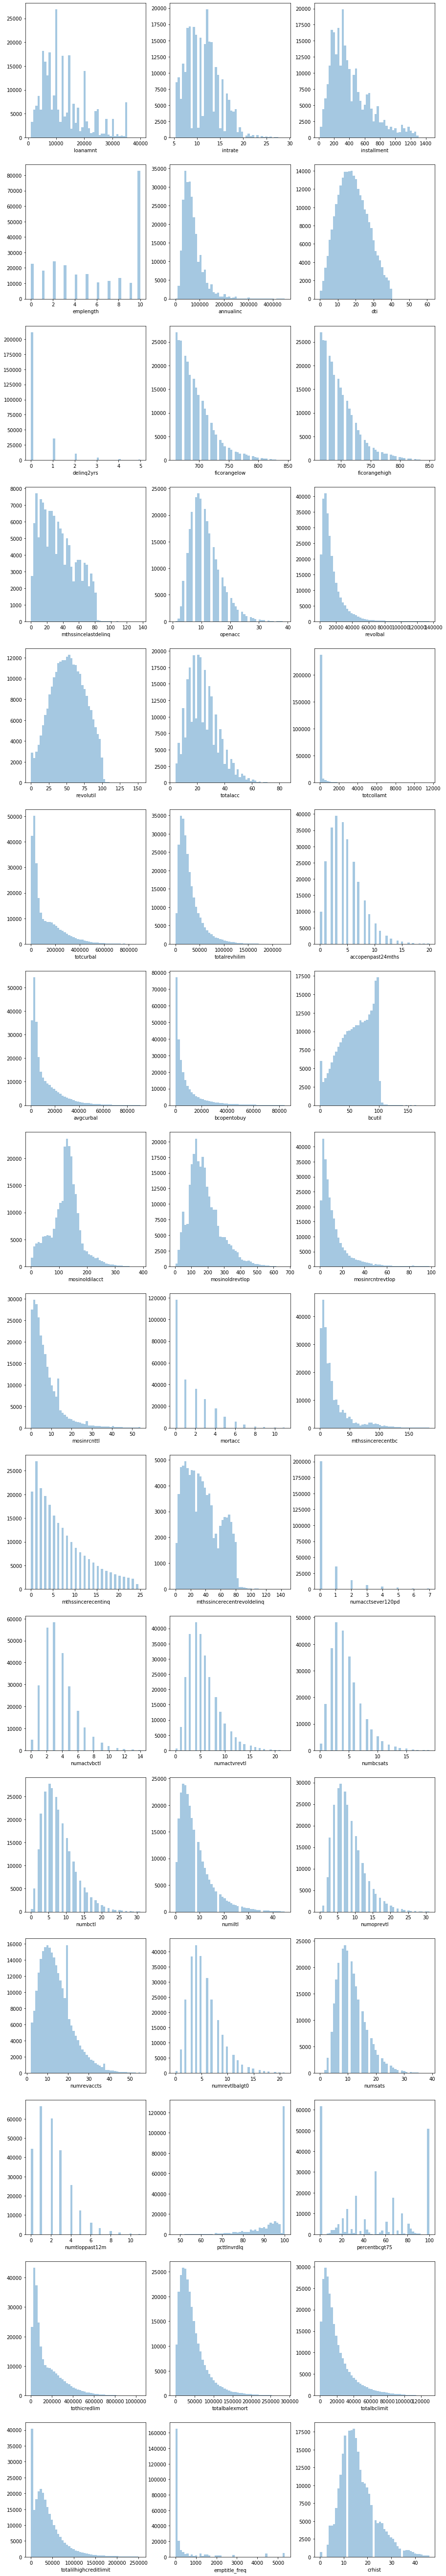

In [36]:
# check continuous features: 
f, axes = plt.subplots(16, 3, figsize = (15, 96))     
axes_ = axes.ravel()
for i in range(48): 
   sns.distplot(feature_cont.iloc[:,i].dropna(), kde=False,   ax=axes_[ i ] )


In [37]:
# discrete features
feature_disc =  df_full.loc[ :, df_full.dtypes.values == 'O']
# delete encoded discrete features:
df_full = df_full.drop(onehot_features + ["addrstate"], axis = 1)
feature_disc.shape

(265080, 8)

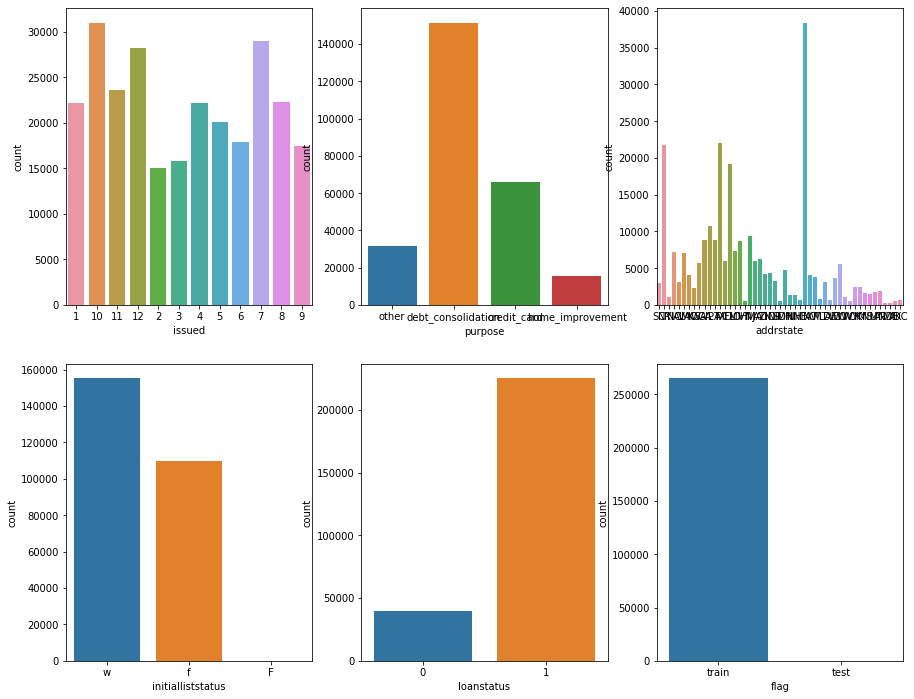

In [38]:
f, axes = plt.subplots(2, 3, figsize = (15,12))
axes_ = axes.ravel()

for i in range(6): 
   sns.countplot(x=feature_disc.columns[i+2], data = feature_disc, ax=axes_[i] )

In [39]:
# integer features
feature_int =  df_full.loc[ :, df_full.dtypes.values == 'int64']
feature_int.shape

(265080, 8)

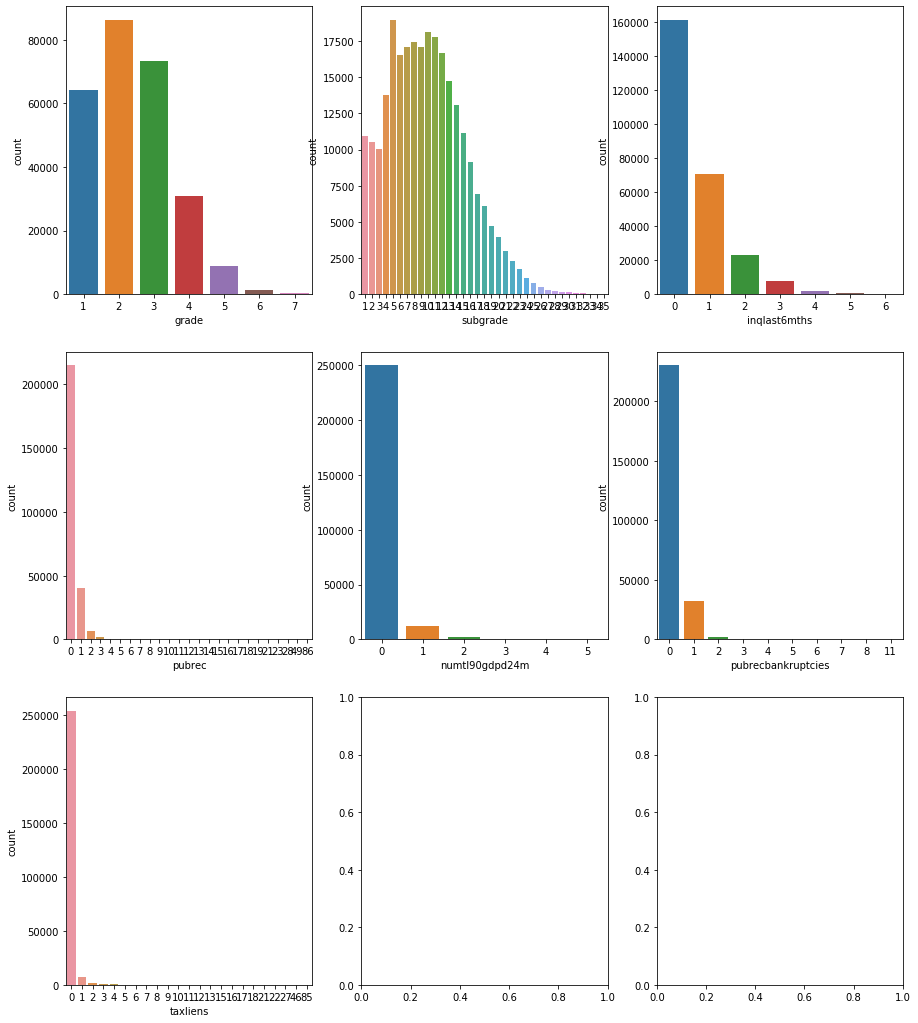

In [40]:
f, axes = plt.subplots(3, 3, figsize = (15,18))
axes_ = axes.ravel()

for i in range(7): 
   sns.countplot(feature_int.iloc[:,i].dropna(),   ax=axes_[ i ] )

In [41]:
df_full.to_csv( "C:/Users/luziy/Documents/datacamp/notes/FinTech/data/df_full_clean.csv" , index=False)